<a href="https://colab.research.google.com/github/bakudbilla/Job_listing_webScraping/blob/main/Job_Listings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# URL of the website
url = "https://www.remoteliz.com/"

In [3]:
# Send a GET request to the website
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
print(soup)

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="width=device-width,initial-scale=1" name="viewport"/><meta content="light" name="color-scheme"/><meta content="#ffffff" name="theme-color"/><meta content="telephone=no" name="format-detection"/><link href="/remoteliz.svg" rel="icon" sizes="any"/><link href="/apple-touch-icon.png" rel="apple-touch-icon"/><title>RemoteLiz - Find Your Dream Remote Job | Remote Job Board</title><meta content="Discover high-paying remote jobs worldwide. RemoteLiz connects talented professionals with remote opportunities in software development, design, marketing, and more. Find your next remote job today." name="description"/><meta content="index, follow, max-image-preview:large" name="robots"/><meta content="website" property="og:type"/><meta content="RemoteLiz" property="og:site_name"/><meta content="RemoteLiz - Find Your Dream Remote Job | Remote Job Board" property="og:title"/><meta content="Discover high-paying remote jobs worl

In [4]:
#Find job listings
job_listings = soup.find_all('a', class_='group relative bg-white rounded-lg border border-gray-200 hover:border-blue-200 hover:shadow-md transition-all duration-200 overflow-hidden')

In [5]:
# Extract details from each job listing
jobs = []
for job in job_listings:
    title = job.find('h2', class_='font-medium text-gray-900 text-sm line-clamp-1 mb-1').text.strip()
    company = job.find('p', class_='text-xs text-gray-700 line-clamp-1 mb-2').text.strip()
    location = job.find('span', class_='inline-flex items-center gap-1 px-1.5 py-0.5 bg-orange-100 text-orange-800 rounded').text.strip()
    salary = job.find_all('span', class_='px-1.5 py-0.5 bg-green-100 text-green-800 rounded')
    salary = salary[0].text.strip() if salary else "Not Available"

    jobs.append({
        'Title': title,
        'Company': company,
        'Location': location,
        'Salary': salary
    })
print(jobs[0])

{'Title': 'Lead Data Analyst - Operations & Fulfillment', 'Company': 'hims & hers', 'Location': 'United States of America', 'Salary': 'USD 155k-190k'}


In [6]:
#changing jobs into a dataframe
data= pd.DataFrame(jobs)
data.head(5)

,Title,Company,Location,Salary
0,Lead Data Analyst - Operations & Fulfillment,hims & hers,United States of America,USD 155k-190k
1,Senior Software Engineer II - ML Core,Splice,United States of America,USD 185k-200k
2,Senior Product Manager,User Interviews,United States of America,USD 130k-130k
3,Regulatory Counsel (Pharmacy),hims & hers,United States of America,USD 190k-220k
4,Staff Solidity Engineer - MetaMask,Consensys,Cameroon +118,USD 155k-207k


In [25]:
# saving the dataframe
data.to_csv('Job_listing.csv')

# DATA ANALYSIS AND CLEANING

In [7]:
#checking number of columns
data.columns

Index(['Title', 'Company', 'Location', 'Salary'], dtype='object')

In [8]:
#checking for null values
data.isnull().sum()

,0
Title,0
Company,0
Location,0
Salary,0


In [9]:
# Handle missing values
data['Salary'] = data['Salary'].replace("Not Available", None)


In [24]:
#check for duplicates
data.duplicated().any().sum()

0

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     19 non-null     object
 1   Company   19 non-null     object
 2   Location  19 non-null     object
 3   Salary    10 non-null     object
dtypes: object(4)
memory usage: 740.0+ bytes


In [12]:
# Convert salary to numeric and removing currency name(USD & EUR)
def extract_salary(salary):
    if salary is None:
        return None
    # Check if salary is a range
    if '-' in salary:
        # Split the range and calculate the average
        low, high = salary.split('-')
        low = low.replace('USD ', '').replace('EUR ', '').replace('k', '').replace('$', '').replace(',', '').strip()
        high = high.replace('USD ', '').replace('EUR ', '').replace('k', '').replace('$', '').replace(',', '').strip()
        return (int(low) + int(high)) / 2 * 1000
    else:
        # Extract the numeric part of the salary
        return int(salary.replace('USD ', '').replace('EUR ', '').replace('k', '').replace('$', '').replace(',', '').strip()) * 1000


In [13]:
data['Salary'] = data['Salary'].apply(extract_salary)
data.head(5)

,Title,Company,Location,Salary
0,Lead Data Analyst - Operations & Fulfillment,hims & hers,United States of America,172500.0
1,Senior Software Engineer II - ML Core,Splice,United States of America,192500.0
2,Senior Product Manager,User Interviews,United States of America,130000.0
3,Regulatory Counsel (Pharmacy),hims & hers,United States of America,205000.0
4,Staff Solidity Engineer - MetaMask,Consensys,Cameroon +118,181000.0


In [19]:
#Finding the most common Job titles
common_job_titles = data['Title'].value_counts().head(5)
print(common_job_titles)

Title
Lead Data Analyst - Operations & Fulfillment    1
Product Manager - Reporting                     1
Senior Solutions Engineer                       1
Sr. Director - Sales Operations & Analytics     1
R&D NPI Commercialization Leader                1
Name: count, dtype: int64


In [20]:
#Average salary by job title
avg_salary_by_title = data.groupby('Title')['Salary'].mean().sort_values(ascending=False).head(10)
print(avg_salary_by_title)

Title
Senior Software Engineer, GraphQL               229000.0
Regulatory Counsel (Pharmacy)                   205000.0
Sr. Director - Sales Operations & Analytics     197500.0
Senior Software Engineer II - ML Core           192500.0
Staff Solidity Engineer - MetaMask              181000.0
Lead Data Analyst - Operations & Fulfillment    172500.0
Senior Manager - Talent Development             150000.0
Senior Solutions Engineer                       131500.0
Sales Solution Consultant - Accounting          130000.0
Senior Product Manager                          130000.0
Name: Salary, dtype: float64


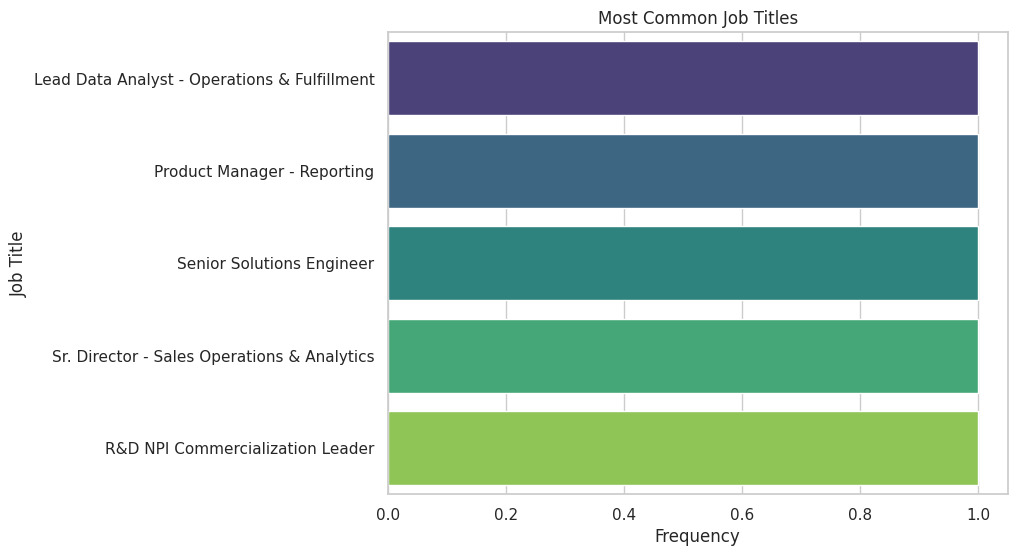

In [22]:
sns.set(style="whitegrid")

# Plot most common job titles
plt.figure(figsize=(8, 6))
sns.barplot(x=common_job_titles.values, y=common_job_titles.index, palette='viridis', hue=common_job_titles.index, legend=False)
plt.title('Most Common Job Titles')
plt.xlabel('Frequency')
plt.ylabel('Job Title')
plt.show()


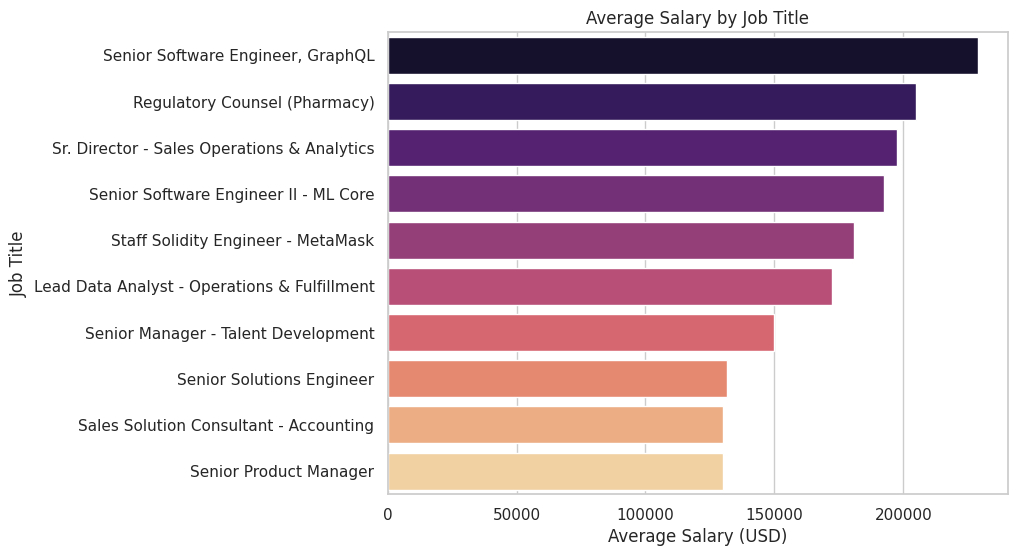

In [23]:
# Plot average salary by job title
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_salary_by_title.values, y=avg_salary_by_title.index, palette='magma', hue=avg_salary_by_title.index, legend=False)
plt.title('Average Salary by Job Title')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')
plt.show()